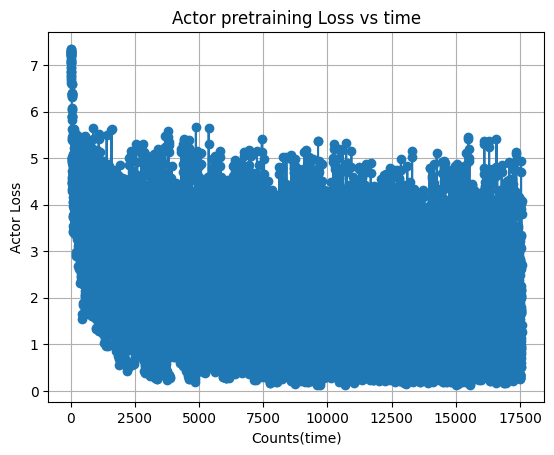

In [6]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Function to extract epoch and loss from each line of the log file
def extract_epoch_loss(line):
    epoch_match = re.search(r'epoch:\s*(\d+)', line)
    loss_match = re.search(r'Loss:\s*tensor\(([\d\.]+)', line)
    if epoch_match and loss_match:
        epoch = int(epoch_match.group(1))
        loss = float(loss_match.group(1))
        return epoch, loss
    else:
        return None, None

# Read log file and extract epoch and loss
log_file = "./layer_norm_swin/pretrain_actor_logs.txt"
epochs = []
losses = []
with open(log_file, 'r') as file:
    for line in file:
        epoch, loss = extract_epoch_loss(line)
        if epoch is not None and loss is not None:
            epochs.append(epoch)
            losses.append(loss)

# Calculate average loss for each epoch
unique_epochs, avg_losses = np.unique(epochs, return_counts=True)
avg_losses = [sum(losses[i:i+count]) / count for i, count in enumerate(avg_losses)]

# Plotting
plt.plot(range(len(losses)), losses, marker='o', linestyle='-')
plt.xlabel('Counts(time)')
plt.ylabel('Actor Loss')
plt.title('Actor pretraining Loss vs time')
plt.grid(True)
plt.savefig('layer_norm_swin_actor_pre.png')
plt.show()



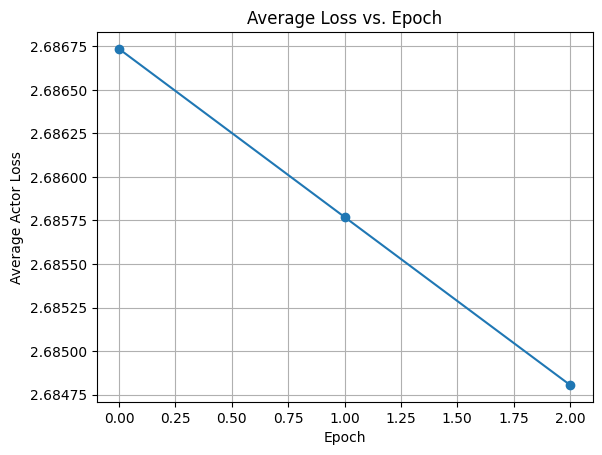

In [11]:
# Plotting
plt.plot(unique_epochs, avg_losses, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Average Actor Loss')
plt.title('Average Loss vs. Epoch')
plt.grid(True)
plt.savefig('./layer_norm_swin/avg_pretraining_actor.png')
plt.show()


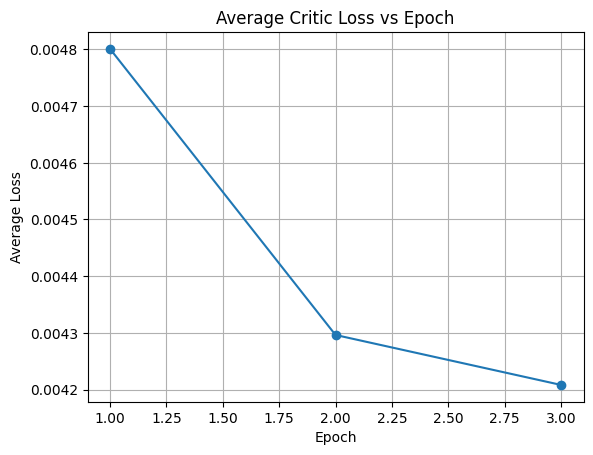

In [12]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Define regular expression patterns to extract iteration and loss values
iteration_pattern = r'Iteration: +(\d+)'
loss_pattern = r'Loss: +tensor\((\d+\.\d+),'

# Initialize variables to store iteration and loss values
iterations = []
losses = []

# Open the log file and iterate through each line
with open('./layer_norm_swin/pretrain_critic_logs.txt', 'r') as file:
    current_epoch = 0
    for line in file:
        # Extract iteration and loss values using regular expressions
        iteration_match = re.search(iteration_pattern, line)
        loss_match = re.search(loss_pattern, line)
        
        if iteration_match:
            iteration = int(iteration_match.group(1))
            # Check if a new epoch has started
            if iteration == 0:
                current_epoch += 1
        if loss_match:
            loss = float(loss_match.group(1))
            iterations.append(current_epoch)
            losses.append(loss)

# Calculate average loss for each epoch
epoch_losses = []
for epoch in range(1, max(iterations) + 1):
    epoch_losses.append(np.mean([loss for it, loss in zip(iterations, losses) if it == epoch]))

# Plot average loss vs epoch
epochs = range(1, len(epoch_losses) + 1)
plt.plot(epochs, epoch_losses, marker='o')
plt.title('Average Critic Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.savefig('./layer_norm_swin/avg_critic_pretraining.png')
plt.show()


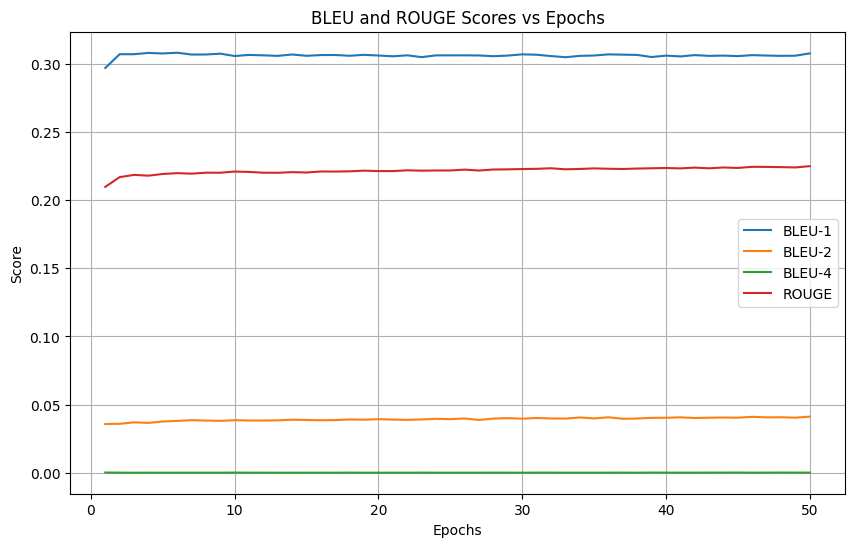

In [18]:
import matplotlib.pyplot as plt
old_path='/data1/agarg/actor-critic/dh602_project/logs_cnn/logs_0.0001_1e-5_128_0.3_1_16/training_results.txt'
new_path='/data1/agarg/actor-critic/dh602_project/logs_swin/logs_0.001_5e-6_128_0.3_1_16/training_results.txt'
path_aug='/data1/agarg/actor-critic/dh602_project/transformer_aug/training_results.txt'
path_layer='actor-critic/dh602_project/layer_norm_aug_short/training_results.txt'
transformer_path='/data1/agarg/actor-critic/dh602_project/transformer_aug/training_results.txt'
stran_path='/data1/agarg/actor-critic/dh602_project/transformer_aug_short/training_results.txt'

# Read the log file
with open(new_path, 'r') as file:
    log = file.readlines()

# Extracting scores from log
bleu1_scores = []
bleu2_scores = []
bleu3_scores = []
bleu4_scores = []
rouge_scores = []

for line in log:
    tokens = line.split()
    bleu1_scores.append(float(tokens[7]))
    bleu2_scores.append(float(tokens[8]))
    bleu3_scores.append(float(tokens[9]))
    bleu4_scores.append(float(tokens[10]))
    rouge_scores.append(float(tokens[11]))

# Plotting
epochs = range(1, len(log) + 1)

plt.figure(figsize=(10, 6))

plt.plot(epochs, bleu1_scores, label='BLEU-1')
plt.plot(epochs, bleu2_scores, label='BLEU-2')
# plt.plot(epochs, bleu3_scores, label='BLEU-3')
plt.plot(epochs, bleu4_scores, label='BLEU-4')
plt.plot(epochs, rouge_scores, label='ROUGE')

plt.title('BLEU and ROUGE Scores vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.savefig('./training_swin.png')
plt.show()
